<a href="https://colab.research.google.com/github/AI-Tiger/ml-project/blob/main/TensorFlow_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 10

IMG_ROWS, IMG_COLS = 28, 28

In [4]:
handwritten_number_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
from keras.datasets import mnist
#
(train_data, train_teacher_labels), (test_data, test_teacher_labels) = mnist.load_data()
print('ロードしたあと学習データ　train_data shape:', train_data.shape)
print('ロードしたあと検証データ　test_data shape:', test_data.shape)

ロードしたあと学習データ　train_data shape: (60000, 28, 28)
ロードしたあと検証データ　test_data shape: (10000, 28, 28)


In [6]:
from keras import backend as Keras

print('Channel調整変換前 train_data shape:', train_data.shape)
print('Channel調整変換前 test_data shape:', test_data.shape)
#
if Keras.image_data_format() == 'channels_first':
    train_data = train_data.reshape(train_data.shape[0], 1, IMG_ROWS, IMG_COLS)
    test_data = test_data.reshape(test_data.shape[0], 1, IMG_ROWS, IMG_COLS)
    input_shape = (1, IMG_ROWS, IMG_COLS)
else:
    train_data = train_data.reshape(train_data.shape[0], IMG_ROWS, IMG_COLS, 1)
    test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS, 1)
    input_shape = (IMG_ROWS, IMG_COLS, 1)

print('Channel調整後 train_data shape:', train_data.shape)
print('Channel調整後 test_data shape:', test_data.shape)

Channel調整変換前 train_data shape: (60000, 28, 28)
Channel調整変換前 test_data shape: (10000, 28, 28)
Channel調整後 train_data shape: (60000, 28, 28, 1)
Channel調整後 test_data shape: (10000, 28, 28, 1)


In [7]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print(test_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [8]:
train_data /= 255
test_data /=255

print('学習データ train_data shape:', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ test_data shape:', test_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

学習データ train_data shape: (60000, 28, 28, 1)
60000 サンプルを学習します
検証データ test_data shape: (10000, 28, 28, 1)
10000 サンプルを検証します


In [9]:
# 学習用教師ラベルデータをOne-hotベクトルに変換します
print('Keras変換前学習用教師ラベルデータ　train_teacher_labels shape:', train_teacher_labels.shape)
train_teacher_labels = keras.utils.to_categorical(train_teacher_labels, NUM_CLASSES)
print('Keras変換後学習用教師ラベルデータ train_teacher_labels shape:', train_teacher_labels)

# 検証用教師ラベルデータをOne-hotベクトルに変換します
print('Keras変換前検証用教師ラベルデータ test_teacher_labels shape:', test_teacher_labels.shape)
print(test_teacher_labels)
test_teacher_labels = keras.utils.to_categorical(test_teacher_labels, NUM_CLASSES)
print('Keras変換後検証用教師ラベルデータ test_teacher_labels shape:', test_teacher_labels.shape)
print(test_teacher_labels)

Keras変換前学習用教師ラベルデータ　train_teacher_labels shape: (60000,)
Keras変換後学習用教師ラベルデータ train_teacher_labels shape: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Keras変換前検証用教師ラベルデータ test_teacher_labels shape: (10000,)
[7 2 1 ... 4 5 6]
Keras変換後検証用教師ラベルデータ test_teacher_labels shape: (10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from keras.models import Sequential

model = Sequential()

In [11]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [12]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [13]:
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [14]:
print('学習させる前 train_data shape:', train_data.shape)
print('学習させる前 test_data shape:', test_data.shape)

学習させる前 train_data shape: (60000, 28, 28, 1)
学習させる前 test_data shape: (10000, 28, 28, 1)


In [15]:
def plot_loss_accuracy_graph(fit_record):
  # 青い線で誤差の履歴をプロットします、検証時誤差は黒い線で
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()
  
  # 緑の線で精度の履歴をプロットします、検証時制度は黒い線で
  plt.plot(fit_record.history['accuracy'],"-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_accuracy'],"-o",color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

In [16]:
print('反復学習回数:', EPOCHS)
fit_record = model.fit(train_data, train_teacher_labels,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       verbose=1,
                       validation_data=(test_data, test_teacher_labels))

反復学習回数: 10
Epoch 1/10
469/469 [==============================] - 145s 307ms/step - loss: 2.3048 - accuracy: 0.1161 - val_loss: 2.2674 - val_accuracy: 0.2939
Epoch 2/10
469/469 [==============================] - 144s 306ms/step - loss: 2.2642 - accuracy: 0.2171 - val_loss: 2.2203 - val_accuracy: 0.4905
Epoch 3/10
469/469 [==============================] - 144s 307ms/step - loss: 2.2177 - accuracy: 0.3294 - val_loss: 2.1615 - val_accuracy: 0.6083
Epoch 4/10
469/469 [==============================] - 144s 307ms/step - loss: 2.1591 - accuracy: 0.4157 - val_loss: 2.0814 - val_accuracy: 0.6650
Epoch 5/10
469/469 [==============================] - 144s 307ms/step - loss: 2.0790 - accuracy: 0.4818 - val_loss: 1.9708 - val_accuracy: 0.7026
Epoch 6/10
469/469 [==============================] - 144s 307ms/step - loss: 1.9710 - accuracy: 0.5270 - val_loss: 1.8213 - val_accuracy: 0.7342
Epoch 7/10
469/469 [==============================] - 144s 307ms/step - loss: 1.8319 - accuracy: 0.5664 - val_los

In [17]:
import matplotlib.pyplot as plt

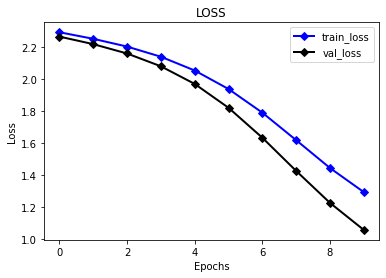

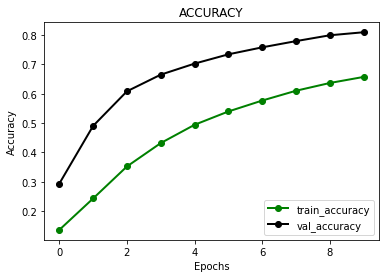

In [18]:
plot_loss_accuracy_graph(fit_record)

In [19]:
result_score = model.evaluate(test_data, test_teacher_labels, verbose=0)

In [20]:
print('検証誤差:', result_score[0])
print('検証正解率:', result_score[1])

検証誤差: 1.055389642715454
検証正解率: 0.8094000220298767


In [21]:
prediction_array = model.predict(test_data)

In [30]:
def plot_image(data_location, predictions_array, real_teacher_labels, dataset):
    predictions_array, real_teacher_labels, img = predictions_array[data_location], real_teacher_labels[data_location], \
    dataset[data_location]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    # 文字の色: 予測結果と実際のラベルと一致する場合は緑、一致しない場合、赤にします
    if predicted_label == real_teacher_labels:
        color = 'green'
    else:
        color = 'red'
    # np.maxはnumpyの関数で、指定した配列の中、最大値を取り出します、ここでは、predictions_arrayの最大値を返します
    plt.xlabel("{} {:2.0f}% ({})".format(handwritten_number_names[predicted_label],
                                         100 * np.max(prediction_array),
                                         handwritten_number_names[real_teacher_labels]),
               color=color)

In [31]:
def plot_teacher_labels_graph(data_location, predictions_array, real_teacher_labels):
    predictions_array, real_teacher_labels = predictions_array[data_location], real_teacher_labels[data_location]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#666666")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[real_teacher_labels].set_color('green')

In [32]:
import numpy as np

In [33]:
def convertOneHotVector2Integers(one_hot_vector):
    return [np.where(r == 1)[0][0] for r in one_hot_vector]

In [34]:
print(test_teacher_labels)
print(convertOneHotVector2Integers(test_teacher_labels))

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 

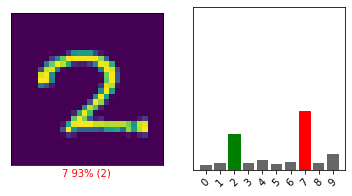

In [35]:
# 描画のために検証データを変換しておきます
test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS)

data_location = 77
plt.figure(figsize=(6, 3))
#
plt.subplot(1, 2, 1)
plot_image(data_location, prediction_array, convertOneHotVector2Integers(test_teacher_labels), test_data)
#
plt.subplot(1, 2, 2)
plot_teacher_labels_graph(data_location, prediction_array, convertOneHotVector2Integers(test_teacher_labels))
_ = plt.xticks(range(10), handwritten_number_names, rotation=45)

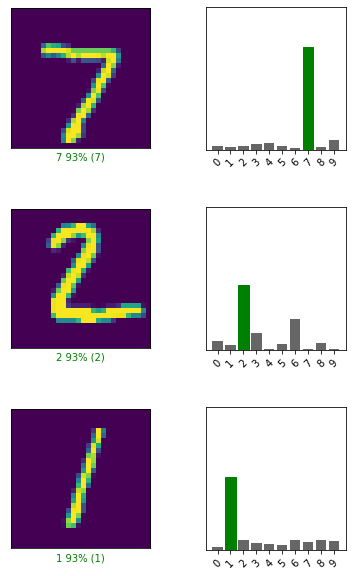

In [44]:
NUM_ROWS = 3
NUM_COLS = 1
NUM_IMAGES = NUM_ROWS*NUM_COLS
#
plt.figure(figsize=(2*2*NUM_COLS+2, 2*NUM_ROWS+4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(NUM_IMAGES):
  #
  plt.subplot(NUM_ROWS, 2*NUM_COLS, 2*i+1)
  plot_image(i, prediction_array,convertOneHotVector2Integers(test_teacher_labels), test_data)
  #
  plt.subplot(NUM_ROWS, 2*NUM_COLS, 2*i+2)
  plot_teacher_labels_graph(i, prediction_array, convertOneHotVector2Integers(test_teacher_labels))
  _ = plt.xticks(range(10), handwritten_number_names, rotation=45)

In [45]:
# 検証データから画像を表示します
img = test_data[data_location]
print(img.shape)

(28, 28)


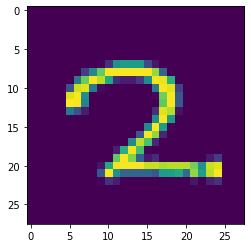

In [46]:
plt.imshow(img)

In [47]:
img = (np.expand_dims(img, 0))
img = img.reshape(1, IMG_ROWS, IMG_COLS, 1)
print(img.shape)

(1, 28, 28, 1)


In [48]:
predictions_result_array = model.predict(img)

print(predictions_result_array)

[[0.03396519 0.04600782 0.21943516 0.04598103 0.06140998 0.03946321
  0.05346619 0.36007825 0.04121928 0.09897387]]


In [50]:
number=np.argmax(predictions_result_array[0])
print('予測結果：',handwritten_number_names[number])

予測結果： 7


In [51]:
model.save('keras-mnist-model.h5')

In [52]:
ls

keras-mnist-model.h5  sample_data/
